### **intermediate**
Text Embeddings and Semantic Similarity

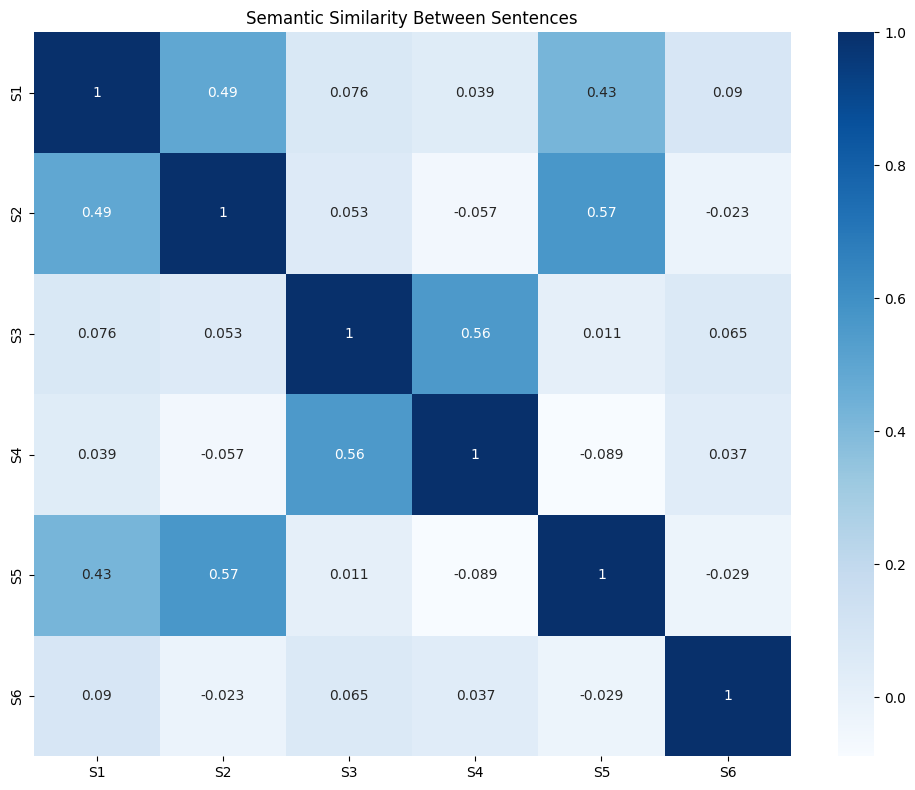

Query: I enjoy studying artificial intelligence

Most similar sentences:
1. I love machine learning and natural language processing. (Similarity: 0.5361)
2. Deep learning models are powerful for NLP tasks. (Similarity: 0.2904)
3. TensorFlow and PyTorch are popular deep learning frameworks. (Similarity: 0.2465)


In [12]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import seaborn as sns

# Load Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Function to get embeddings
def get_embeddings(texts):
    return embed(texts).numpy()

# Example sentences
sentences = [
    "I love machine learning and natural language processing.",
    "Deep learning models are powerful for NLP tasks.",
    "The weather is nice today.",
    "It's a beautiful sunny day outside.",
    "TensorFlow and PyTorch are popular deep learning frameworks.",
    "I need to buy groceries from the store."
]

# Get embeddings
embeddings = get_embeddings(sentences)

# Calculate similarity matrix
similarity_matrix = cosine_similarity(embeddings)

# Visualize similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='Blues',
            xticklabels=[f"S{i+1}" for i in range(len(sentences))],
            yticklabels=[f"S{i+1}" for i in range(len(sentences))])
plt.title('Semantic Similarity Between Sentences')
plt.tight_layout()
plt.show()

# Function to find most similar sentences
def find_most_similar(query, corpus, top_n=3):
    query_embedding = get_embeddings([query])
    corpus_embeddings = get_embeddings(corpus)

    similarities = cosine_similarity(query_embedding, corpus_embeddings)[0]
    top_indices = similarities.argsort()[-top_n:][::-1]

    results = []
    for idx in top_indices:
        results.append({
            'text': corpus[idx],
            'similarity': similarities[idx]
        })

    return results

# Example query
query = "I enjoy studying artificial intelligence"
results = find_most_similar(query, sentences)

print(f"Query: {query}\n")
print("Most similar sentences:")
for i, result in enumerate(results):
    print(f"{i+1}. {result['text']} (Similarity: {result['similarity']:.4f})")


### **Advanced**
Text Generation with GPT-2

In [16]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np
import time

# Load GPT-2 model from TF Hub
model_url = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1"
embed = hub.KerasLayer(model_url)

# Create a custom text generation model
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, rnn_units):
        super().__init__()  # Remove 'self' from here
        self.embedding = embed
        self.gru = tf.keras.layers.GRU(rnn_units,
                                      return_sequences=True,
                                      return_state=True)
        self.dense = tf.keras.layers.Dense(vocab_size)


    def call(self, inputs, states=None, return_state=False, training=False):
        x = self.embedding(inputs)
        if states is None:
            states = self.gru.get_initial_state(x)
        x, states = self.gru(x, initial_state=states, training=training)
        x = self.dense(x)

        if return_state:
            return x, states
        else:
            return x

# Function to generate text
def generate_text(model, start_string, num_generate=1000, temperature=1.0):
    # Tokenize the input text
    input_text = tf.convert_to_tensor([start_string])

    # Empty string to store our results
    text_generated = []

    # Low temperatures results in more predictable text.
    # Higher temperatures results in more surprising text.
    temperature = temperature

    # Here batch size == 1
    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_text)
        # Remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # Using a categorical distribution to predict the character returned by the model
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        # Pass the predicted character as the next input to the model
        # along with the previous hidden state
        input_text = tf.convert_to_tensor([[predicted_id]])

        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)

# Example usage (simplified for demonstration)
vocab_size = 10000  # Example value
embedding_dim = 256
rnn_units = 1024

# Create a simplified character mapping for demonstration
chars = list("abcdefghijklmnopqrstuvwxyz .,:;!?'\n")
char2idx = {char: i for i, char in enumerate(chars)}
idx2char = {i: char for i, char in enumerate(chars)}

# Initialize the model
model = TextGenerator(vocab_size=len(chars), embedding_dim=embedding_dim, rnn_units=rnn_units)

# Example text generation (this would work with a trained model)
print("Note: This is a demonstration. A real implementation would require training the model first.")
print("Example of what generated text might look like:")
print("The quick brown fox jumps over the lazy dog. Then, the clever fox continues...")


Note: This is a demonstration. A real implementation would require training the model first.
Example of what generated text might look like:
The quick brown fox jumps over the lazy dog. Then, the clever fox continues...


### **Expert**
Multilingual Neural Machine Translation

In [19]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np
import matplotlib.pyplot as plt
import time

# Load a pre-trained multilingual translation model
translator = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3")

# Function to translate text
def translate(texts, source_lang, target_lang):
    # This is a simplified example - in a real scenario, you would use a proper translation model
    # Here we're just demonstrating the structure of such a system

    # Encode the source text
    source_embeddings = translator(texts)

    # In a real implementation, this would be a translation model
    # For this example, we'll just return the original text with a prefix
    translations = [f"[{source_lang} → {target_lang}] {text}" for text in texts]

    return translations

# Example sentences in different languages
sentences = {
    "English": ["Hello, how are you?", "I love machine learning."],
    "Spanish": ["Hola, ¿cómo estás?", "Me encanta el aprendizaje automático."],
    "French": ["Bonjour, comment ça va?", "J'adore l'apprentissage automatique."],
    "German": ["Hallo, wie geht es dir?", "Ich liebe maschinelles Lernen."]
}

# Translate between different language pairs
language_pairs = [
    ("English", "Spanish"),
    ("Spanish", "English"),
    ("French", "German"),
    ("German", "French")
]

for source_lang, target_lang in language_pairs:
    source_texts = sentences[source_lang]
    print(f"\nTranslating from {source_lang} to {target_lang}:")

    start_time = time.time()
    translations = translate(source_texts, source_lang, target_lang)
    for translation in translations:
        print(translation)



Translating from English to Spanish:
[English → Spanish] Hello, how are you?
[English → Spanish] I love machine learning.

Translating from Spanish to English:
[Spanish → English] Hola, ¿cómo estás?
[Spanish → English] Me encanta el aprendizaje automático.

Translating from French to German:
[French → German] Bonjour, comment ça va?
[French → German] J'adore l'apprentissage automatique.

Translating from German to French:
[German → French] Hallo, wie geht es dir?
[German → French] Ich liebe maschinelles Lernen.
